In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


Данные представляют из себя информацию о заказах разных блюд в ресторане.
В таблице 4622 строки.
Столбцы: номер заказа, количество блюд, само блюдо, описание выбора, цена блюд.

In [3]:
df.item_name.nunique()

50

В выборку попало 1834 заказа. Было куплено 50 уникальных категорий товара.

In [4]:
pd.isna(df).any()

order_id              False
quantity              False
item_name             False
choice_description     True
item_price            False
dtype: bool

Есть пропуски. Только в колонке choice_description.

In [5]:
df = df.fillna(value='')

In [6]:
df['item_price'][0].__class__

str

Колонка с ценой товара имеет тип str.

In [7]:
df = df.apply(lambda x: x.append(pd.Series([eval(x['item_price'].strip('$ ')), eval(x['item_price'].strip('$ ')) / x['quantity']], index=['item_price_num', 'price_for_one'])), axis=1)

In [8]:
df

,order_id,quantity,item_name,choice_description,item_price,item_price_num,price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


In [9]:
df['price_for_one'].mean()

7.084424491562094

In [10]:
df['price_for_one'].min()

1.09

In [11]:
df['price_for_one'].max()

11.89

Средняя цена товара составляет примерно 7 долларов, минимальная -- 1.09 долларов, а максимальная цена товара равна 11.89 долларов.

In [12]:
df = df.drop(labels='item_price', axis=1)

In [13]:
df

,order_id,quantity,item_name,choice_description,item_price_num,price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [14]:
df.drop_duplicates('choice_description').sort_values('price_for_one').head(5)

,order_id,quantity,item_name,choice_description,item_price_num,price_for_one
51,23,2,Canned Soda,[Mountain Dew],2.18,1.09
162,73,2,Canned Soda,[Diet Coke],2.18,1.09
126,55,1,Canned Soda,[Coca Cola],1.09,1.09
28,14,1,Canned Soda,[Dr. Pepper],1.09,1.09
117,51,1,Canned Soda,[Diet Dr. Pepper],1.09,1.09


In [15]:
df.drop_duplicates('choice_description').sort_values('price_for_one').tail(5)

,order_id,quantity,item_name,choice_description,item_price_num,price_for_one
1159,478,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
3350,1343,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Cheese, Guacamole, Lettu...",11.89,11.89
2740,1088,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Black...",11.89,11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
1571,637,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Sour ...",11.89,11.89


In [16]:
(df.loc[:, ['order_id', 'quantity']][df['item_name'] == 'Chicken Bowl'].groupby('order_id').sum().to_numpy().ravel() > 1).sum()

114

Клиенты покупали больше 1 Chicken Bowl 114 раз.

In [17]:
df.groupby('order_id').sum().mean()

quantity           2.711014
item_price_num    18.811429
price_for_one     17.853986
dtype: float64

Средний чек у заказа равен примерно 18.81 долларов. В среднем покупают примерно 2.71 товаров.

In [18]:
(df.groupby('order_id').sum()['quantity'] == 1).sum()

56

56 заказов содержали ровно один товар.

In [19]:
df.groupby('item_name').sum()['quantity'].idxmax()

'Chicken Bowl'

Chicken Bowl самая популярная категория товара, если считать "популярность" как суммарное количество купленных товаров каждой категории.

In [20]:
print(np.unique(df[df['item_name'] == 'Burrito']['choice_description'].to_numpy()))

['[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]'
 '[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]'
 '[Braised Barbacoa, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]'
 '[Braised Barbacoa, Vegetarian Black Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice]]'
 '[White Rice, Adobo-Marinated and Grilled Steak, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice]]'
 '[White Rice, Adobo-Marinated and Grilled Steak, [Salsa, Cheese]]']


Такие 6 видов Burrito существуют.

In [21]:
df[df['item_name'] == 'Burrito']

,order_id,quantity,item_name,choice_description,item_price_num,price_for_one
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.4,7.4
511,214,1,Burrito,"[Braised Barbacoa, Vegetarian Black Beans, [So...",7.4,7.4
519,217,1,Burrito,"[Braised Barbacoa, Pinto Beans, [Sour Cream, S...",7.4,7.4
675,279,1,Burrito,"[Adobo-Marinated and Grilled Chicken, [Sour Cr...",7.4,7.4
759,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",7.4,7.4
760,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",7.4,7.4


Все виды Burrito покупали по одному разу и стоят они все одинаково.

In [22]:
(df.groupby('order_id').sum()['item_price_num'] * 0.4 < df.groupby('order_id').max()['price_for_one']).sum()

1589

В 1589 заказах есть товар, который стоит более 40% от суммы всего чека.

In [23]:
val_before = df[df['choice_description'] == '[Diet Coke]']['item_price_num'].sum()

In [24]:
df.loc[(df['choice_description'] == '[Diet Coke]') & (df['price_for_one'] == 1.25), 'price_for_one'] = 1.35

In [25]:
df = df.drop('item_price_num', axis=1)

In [26]:
df = df.apply(lambda x: x.append(pd.Series(x['quantity'] * x['price_for_one'], index=['item_price_num'])), axis=1)

In [27]:
df

,order_id,quantity,item_name,choice_description,price_for_one,item_price_num
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.49,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [28]:
val_after = df[df['choice_description'] == '[Diet Coke]']['item_price_num'].sum()

In [29]:
print((val_after / val_before - 1) * 100)

3.5199412322855173


На 3.52% денег больше было заработано на товаре Diet Coke.

In [30]:
data = np.random.rand(10, 3)

In [31]:
df2 = pd.DataFrame(data, index=data[:, 0], columns=['index', 'column1', 'column2'])

In [32]:
df2

,index,column1,column2
0.147384,0.147384,0.177958,0.131307
0.210678,0.210678,0.352874,0.617677
0.914754,0.914754,0.460108,0.001895
0.682806,0.682806,0.031856,0.222115
0.015250,0.015250,0.783275,0.900558
0.874159,0.874159,0.165318,0.006912
0.994962,0.994962,0.141651,0.084114
0.631360,0.631360,0.947897,0.131106
0.725362,0.725362,0.143291,0.773064
0.522194,0.522194,0.226509,0.714736


In [33]:
df2.to_csv('data2.csv', header=False, index=False)

In [34]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=np.random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

df['date'] = df.order_id.map(dates['date'])

In [35]:
df

,order_id,quantity,item_name,choice_description,price_for_one,item_price_num,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39,2018-01-01
1,1,1,Izze,[Clementine],3.39,3.39,2018-01-01
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-01
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39,2018-01-01
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.49,16.98,2018-01-03
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,2018-01-12
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,2018-01-12
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,2018-01-21
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,2018-01-21


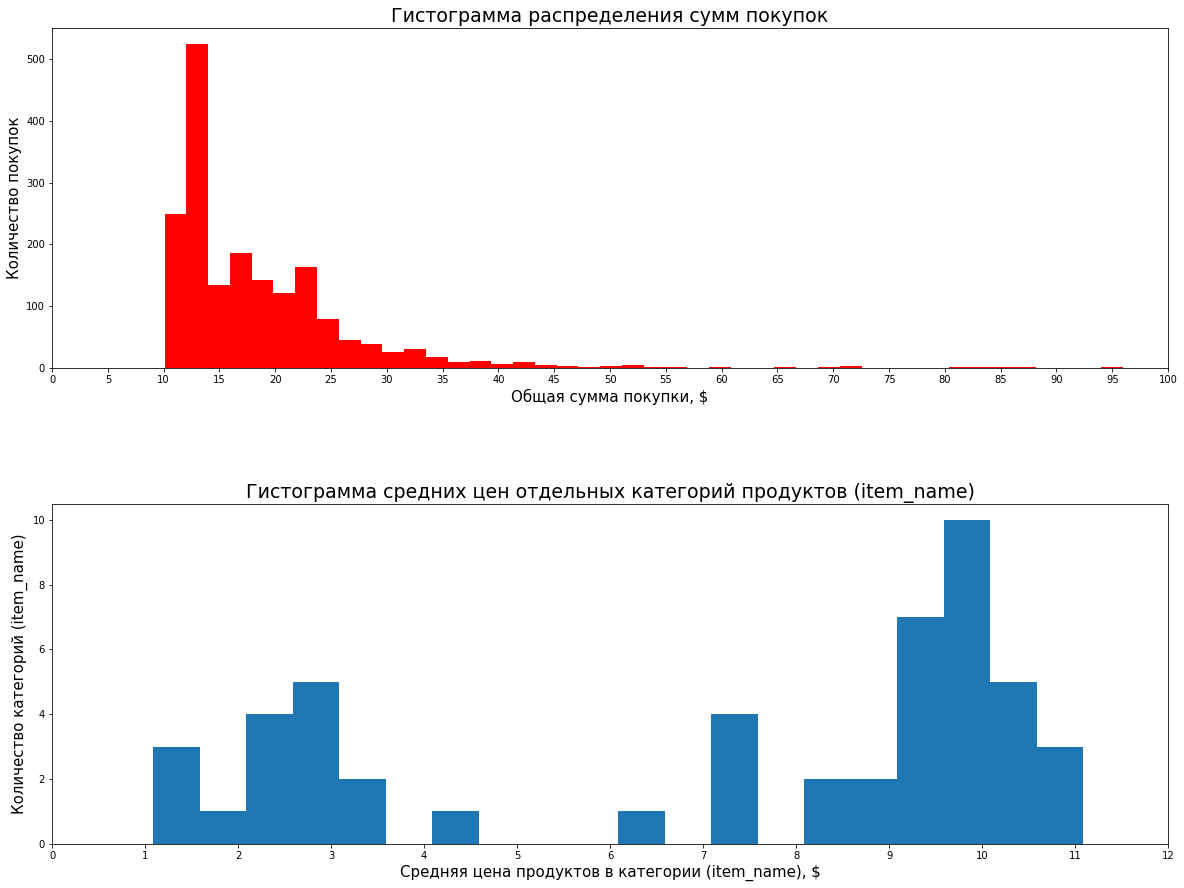

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4)
plt.subplot(211)
plt.hist(df.groupby('order_id').sum()['item_price_num'], bins=100, color='red')
plt.title('Гистограмма распределения сумм покупок', fontsize=19)
plt.xlabel('Общая сумма покупки, $', fontsize=15)
plt.ylabel('Количество покупок', fontsize=15)
plt.xlim([0, 100])
plt.xticks(np.arange(0, 101, 5))
plt.subplot(212)
item_name_means = [df[df.item_name == x].groupby('choice_description').mean()['price_for_one'].mean() for x in df.item_name.unique()]
plt.hist(item_name_means, bins=20)
plt.title('Гистограмма средних цен отдельных категорий продуктов (item_name)', fontsize=19)
plt.xlabel('Средняя цена продуктов в категории (item_name), $', fontsize=15)
plt.ylabel('Количество категорий (item_name)', fontsize=15)
plt.xticks(np.arange(0, 13))
plt.show()

In [37]:
days = [int(item[8:]) for item in df.groupby('date').sum().index]

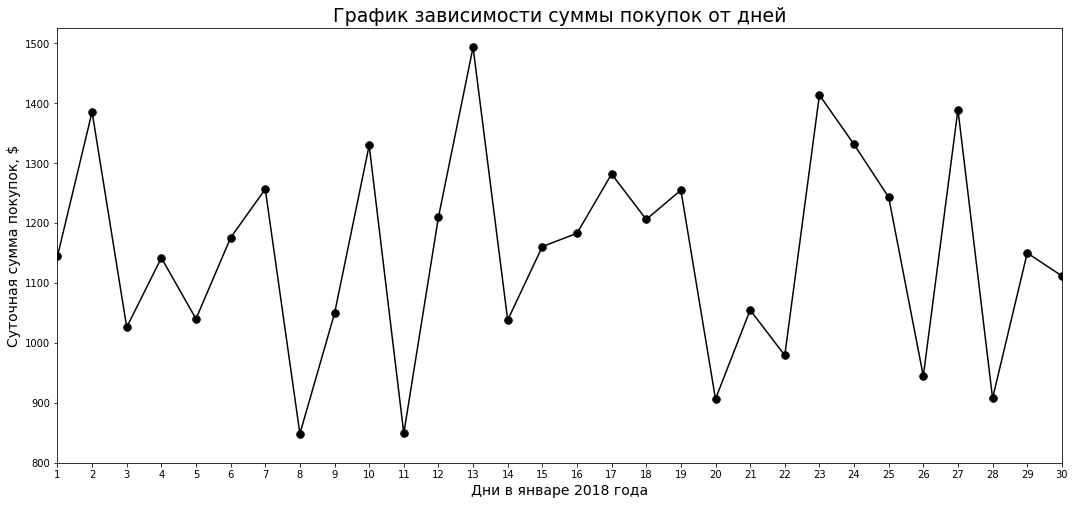

In [38]:
fig = plt.figure(figsize=(18, 8))
plt.plot(days, df.groupby('date').sum()['item_price_num'], color='black', marker='.', ms=15)
plt.title('График зависимости суммы покупок от дней', fontsize=19)
plt.xlabel('Дни в январе 2018 года', fontsize=14)
plt.ylabel('Суточная сумма покупок, $', fontsize=14)
plt.xlim([1, 30])
plt.xticks(np.arange(1, 31))
plt.yticks(np.arange(800, 1501, 100))
plt.show()

In [39]:
df_orderid_sum = df.groupby('order_id').sum()

In [40]:
df_nodup_orderid = df.drop_duplicates('order_id')

In [41]:
df_nodup_orderid.index = df_nodup_orderid.order_id

In [42]:
df_orderid_sum['date'] = df_nodup_orderid['date']

In [43]:
df_orderid_sum

,quantity,price_for_one,item_price_num,date
order_id,,,,
1,4,11.56,11.56,2018-01-01
2,2,8.49,16.98,2018-01-03
3,2,12.67,12.67,2018-01-27
4,2,21.00,21.00,2018-01-23
5,2,13.70,13.70,2018-01-01
...,...,...,...,...
1830,2,23.00,23.00,2018-01-03
1831,3,12.90,12.90,2018-01-25
1832,2,13.20,13.20,2018-01-01


In [44]:
df_orderid_sum['weekday'] = df_orderid_sum.date.map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').isoweekday())

In [45]:
df_orderid_sum

,quantity,price_for_one,item_price_num,date,weekday
order_id,,,,,
1,4,11.56,11.56,2018-01-01,1
2,2,8.49,16.98,2018-01-03,3
3,2,12.67,12.67,2018-01-27,6
4,2,21.00,21.00,2018-01-23,2
5,2,13.70,13.70,2018-01-01,1
...,...,...,...,...,...
1830,2,23.00,23.00,2018-01-03,3
1831,3,12.90,12.90,2018-01-25,4
1832,2,13.20,13.20,2018-01-01,1


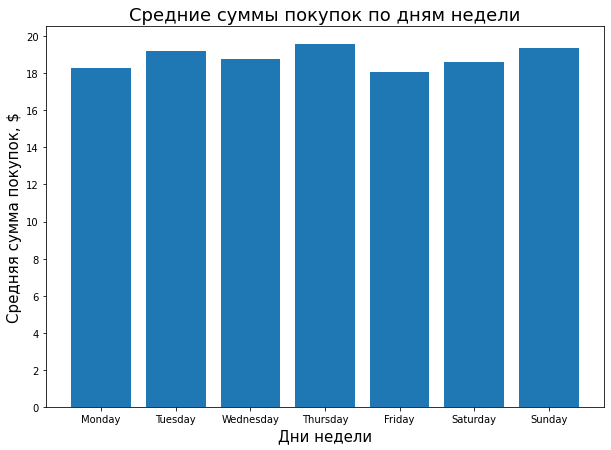

In [46]:
fig = plt.figure(figsize=(10, 7))
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], df_orderid_sum.groupby('weekday', sort=True).mean()['item_price_num'])
plt.title('Средние суммы покупок по дням недели', fontsize=18)
plt.xlabel('Дни недели', fontsize=15)
plt.ylabel('Средняя сумма покупок, $', fontsize=15)
plt.yticks(np.arange(0, 21, 2))
plt.show()

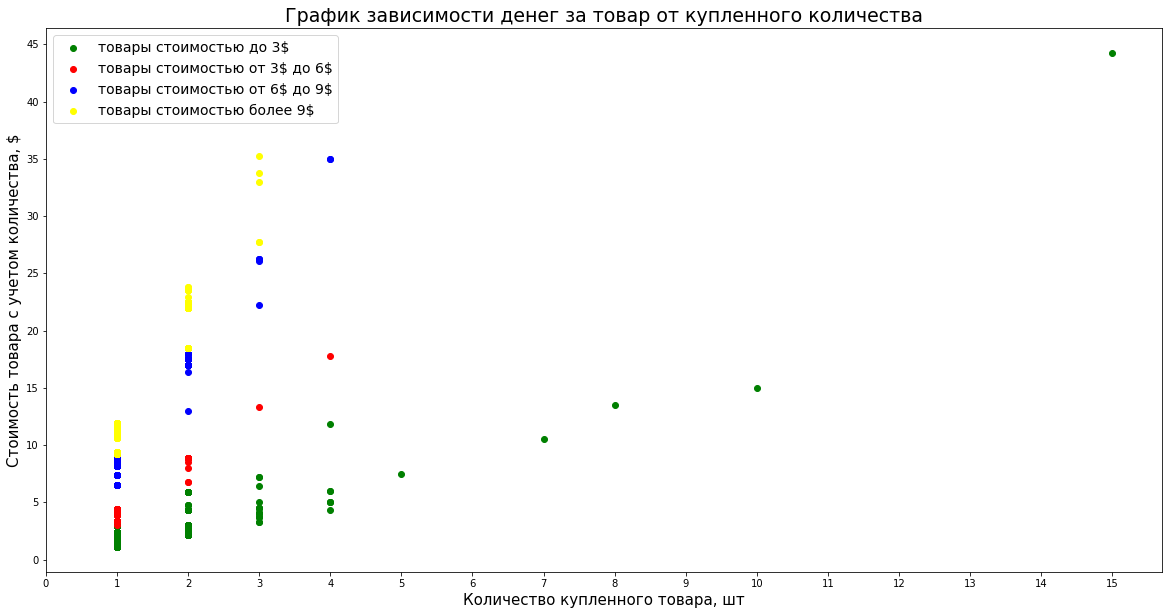

In [47]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(df[df.price_for_one < 3].quantity, df[df.price_for_one < 3].item_price_num, c='green', label='товары стоимостью до 3$')
plt.scatter(df[(df.price_for_one >= 3) & (df.price_for_one < 6)].quantity, df[(df.price_for_one >= 3) & (df.price_for_one < 6)].item_price_num, c='red', label='товары стоимостью от 3\$ до 6\$')
plt.scatter(df[(df.price_for_one >= 6) & (df.price_for_one < 9)].quantity, df[(df.price_for_one >= 6) & (df.price_for_one < 9)].item_price_num, c='blue', label='товары стоимостью от 6\$ до 9\$')
plt.scatter(df[df.price_for_one >= 9].quantity, df[df.price_for_one >= 9].item_price_num, c='yellow', label='товары стоимостью более 9$')
plt.title('График зависимости денег за товар от купленного количества', fontsize=19)
plt.xlabel('Количество купленного товара, шт', fontsize=15)
plt.ylabel('Стоимость товара с учетом количества, $', fontsize=15)
plt.xticks(np.arange(0, 16))
plt.yticks(np.arange(0, 46, 5))
plt.legend(loc=2, prop={'size': 14})
plt.show()

На графике изображены зависимости стоимости товаров от купленного количества. Я разделил товары на 4 группы по цене, чтобы проще было увидеть зависимость стоимости от количества. На графике видна линейная зависимость в каждой категории, что говорит о том, что итоговая цена равна просто произведению количества купленного товара на цену за один товар. То есть никаких скидок при покупке большого количества товара за один раз не делается.
Иная зависимость прослеживается при закупке товара оптом, там точки можно было бы приблизить выпуклым вверх графиком.

In [48]:
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
fig.savefig('fig1.pdf', format='pdf', dpi=600)